In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import folium
from folium.plugins import HeatMap
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
crashes = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [3]:
crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/02/2020,0:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4267700,Sedan,NaN,NaN,NaN,NaN
1,01/02/2020,12:57,NaN,NaN,NaN,NaN,NaN,W 57 & 8th Ave,W 57,NaN,...,Unspecified,NaN,NaN,NaN,4268255,Taxi,Pick-up Truck,NaN,NaN,NaN
2,01/02/2020,15:00,NaN,NaN,40.668266,-73.84214,"(40.668266, -73.84214)",CROSS BAY BOULEVARD,SOUTH CONDUIT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4268222,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
3,01/02/2020,15:10,BROOKLYN,11206.0,40.700527,-73.94161,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN
4,01/02/2020,17:30,NaN,NaN,NaN,NaN,NaN,NORTHERN BOULEVARD,68 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4268708,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [4]:
crashes['CRASH TIME'] = pd.to_datetime(crashes['CRASH TIME'])
crashes['CRASH DATE'] = pd.to_datetime(crashes['CRASH DATE'])
crashes.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [5]:
crashes_filtered = crashes["BOROUGH"].notnull() 
crashes_filtered.head()

0    False
1    False
2    False
3     True
4    False
Name: BOROUGH, dtype: bool

In [6]:
crashes_clean = crashes[crashes_filtered]

In [7]:
crashes_clean.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2020-01-02,2021-04-13 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN
5,2020-01-02,2021-04-13 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,...,Unspecified,NaN,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,2020-01-02,2021-04-13 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,...,Other Vehicular,NaN,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN
9,2020-01-02,2021-04-13 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN
11,2020-01-02,2021-04-13 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,...,NaN,NaN,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Hours')

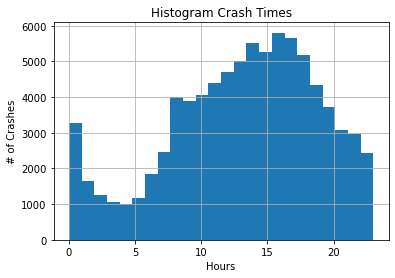

In [8]:
crashes_clean["CRASH TIME"].dt.hour.hist(bins = 24)
plt.title("Histogram Crash Times")
plt.ylabel("# of Crashes")
plt.xlabel("Hours")

Text(0.5, 0, 'Boroughs')

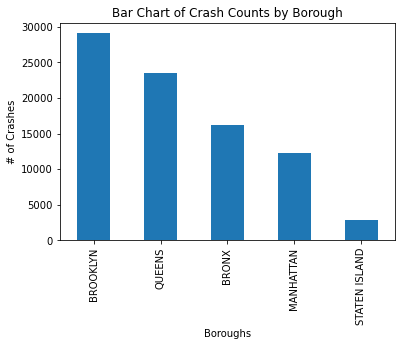

In [9]:
crashes_clean['BOROUGH'].value_counts().plot(kind='bar');
plt.title("Bar Chart of Crash Counts by Borough")
plt.ylabel("# of Crashes")
plt.xlabel("Boroughs")

In [10]:
crash_veh1 = crashes_clean["VEHICLE TYPE CODE 1"] == "Sedan"
crash_veh2 = crashes_clean["VEHICLE TYPE CODE 1"] == "Station Wagon/Sport Utility Vehicle"
crash_veh3 = crashes_clean["VEHICLE TYPE CODE 1"] == "Taxi"
crash_veh4 = crashes_clean["VEHICLE TYPE CODE 1"] == "Pick-up Truck"
crash_veh5 = crashes_clean["VEHICLE TYPE CODE 1"] == "Box Truck"
crash_veh6 = crashes_clean["VEHICLE TYPE CODE 1"] == "Bus"
crash_veh7 = crashes_clean["VEHICLE TYPE CODE 1"] == "Bike"

crashestest = crashes_clean[crash_veh1 | crash_veh2 | crash_veh3 | crash_veh4 | crash_veh5 | crash_veh6 | crash_veh7]
#sns.relplot(x="VEHICLE TYPE CODE 1", y="NUMBER OF PERSONS INJURED", hue="BOROUGH", data=crashestest)
crashestest["MONTH"] = crashestest["CRASH DATE"].dt.month
crashestest.reset_index(drop=True)
crashestest.dtypes

<ipython-input-10-5f151ad603a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashestest["MONTH"] = crashestest["CRASH DATE"].dt.month


CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

Text(0.5, 6.79999999999999, 'Month')

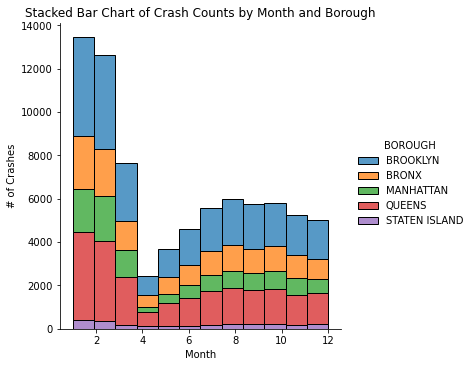

In [11]:
sns.displot(crashestest, x="MONTH", hue="BOROUGH", multiple="stack", bins = 12)
plt.title("Stacked Bar Chart of Crash Counts by Month and Borough")
plt.ylabel("# of Crashes")
plt.xlabel("Month")

In [12]:
#crashestest2 = crashestest["LATITUDE"] != 0
crashes_map = folium.Map(location=[40.7128, -74.0060])
crashestest.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
crashestest = crashestest.reset_index(drop=True)

<ipython-input-12-16f93aa46c3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashestest.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)


In [13]:
crashestest.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH
0,2020-01-02,2021-04-13 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN,1
1,2020-01-02,2021-04-13 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,...,NaN,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1
2,2020-01-02,2021-04-13 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,...,NaN,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN,1
3,2020-01-02,2021-04-13 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,...,NaN,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN,1
4,2020-01-02,2021-04-13 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,...,NaN,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN,1


In [14]:
crashestest['COUNT'] = crashestest.groupby('LATITUDE')['LONGITUDE'].transform('count')

In [15]:
crashestest_month = crashestest.groupby("MONTH").sum()["NUMBER OF PERSONS INJURED"]
crashestest_month

MONTH
1     4022.0
2     3544.0
3     1995.0
4      654.0
5     1308.0
6     1981.0
7     2279.0
8     2464.0
9     2465.0
10    2236.0
11    2051.0
12    1786.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

In [16]:
crashestest.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,COUNT
0,2020-01-02,2021-04-13 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,...,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN,1,2
1,2020-01-02,2021-04-13 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,...,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,1
2,2020-01-02,2021-04-13 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,...,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN,1,4
3,2020-01-02,2021-04-13 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,...,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN,1,2
4,2020-01-02,2021-04-13 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,...,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN,1,2


In [17]:

HeatMap(data=crashestest[['LATITUDE', 'LONGITUDE','COUNT']].groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), radius=13).add_to(crashes_map)
crashes_map

Text(0.5, 6.79999999999999, 'Month')

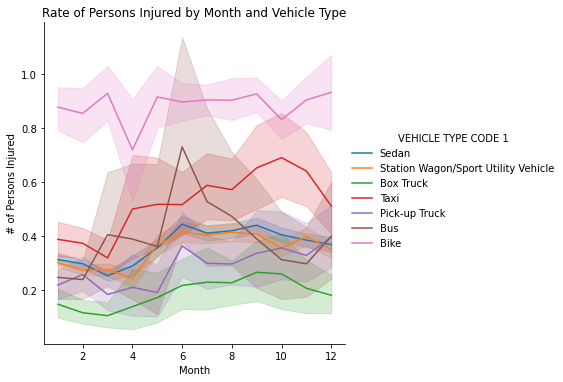

In [18]:
sns.relplot(x = "MONTH", y = "NUMBER OF PERSONS INJURED", hue = "VEHICLE TYPE CODE 1", kind = "line", data = crashestest)
plt.title("Rate of Persons Injured by Month and Vehicle Type")
plt.ylabel("# of Persons Injured")
plt.xlabel("Month")

In [19]:
#sns.pairplot(crashestest)

In [20]:
pd.options.display.max_columns = None

In [21]:
crashestest['COUNT_INJ2'] = crashestest.groupby("MONTH").sum()["NUMBER OF PERSONS INJURED"]


In [22]:
crashestest

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,COUNT,COUNT_INJ2
0,2020-01-02,2021-04-13 15:10:00,BROOKLYN,11206.0,40.700527,-73.941610,"(40.700527, -73.94161)",NaN,NaN,760 BROADWAY,1.0,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,4268246,Sedan,NaN,NaN,NaN,NaN,1,2,NaN
1,2020-01-02,2021-04-13 20:45:00,BRONX,10460.0,40.843033,-73.881805,"(40.843033, -73.881805)",NaN,NaN,948 EAST 179 STREET,0.0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4268164,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,1,4022.0
2,2020-01-02,2021-04-13 10:10:00,MANHATTAN,10022.0,40.759740,-73.974230,"(40.75974, -73.97423)",EAST 53 STREET,MADISON AVENUE,NaN,0.0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,4268253,Sedan,Sedan,NaN,NaN,NaN,1,4,3544.0
3,2020-01-02,2021-04-13 13:00:00,BROOKLYN,11226.0,40.653328,-73.959404,"(40.653328, -73.959404)",NaN,NaN,793 FLATBUSH AVENUE,0.0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4268069,Sedan,NaN,NaN,NaN,NaN,1,2,1995.0
4,2020-01-02,2021-04-13 16:40:00,BROOKLYN,11213.0,40.672130,-73.926414,"(40.67213, -73.926414)",NaN,NaN,1539 PARK PLACE,1.0,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4273744,Sedan,NaN,NaN,NaN,NaN,1,2,654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75621,2021-03-06,2021-04-13 06:14:00,BRONX,10452.0,40.841960,-73.915306,"(40.84196, -73.915306)",EAST 172 STREET,TOWNSEND AVENUE,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4396610,Sedan,NaN,NaN,NaN,NaN,3,3,NaN
75622,2021-03-06,2021-04-13 17:00:00,MANHATTAN,10031.0,40.822834,-73.953710,"(40.822834, -73.95371)",NaN,NaN,610 WEST 139 STREET,0.0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4396982,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,3,11,NaN
75623,2021-03-06,2021-04-13 19:30:00,BRONX,10466.0,40.887096,-73.860870,"(40.887096, -73.86087)",WHITE PLAINS ROAD,EAST 224 STREET,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4396676,Sedan,NaN,NaN,NaN,NaN,3,2,NaN
75624,2021-03-06,2021-04-13 16:30:00,QUEENS,11101.0,40.737537,-73.929955,"(40.737537, -73.929955)",HUNTERS POINT AVENUE,GREENPOINT AVENUE,NaN,0.0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Passing or Lane Usage Improper,NaN,NaN,NaN,4396622,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,3,14,NaN


In [3]:
#g = sns.catplot(x = "MONTH", y = "value",hue = "BOROUGH", kind = "box", data = crashestest)
#g.fig.set_size_inches(20,6)

In [4]:
#sns.relplot(x = "MONTH", y = "COUNT_INJ", hue="BOROUGH", data=crashestest)

In [ ]:
#profile = ProfileReport(crashes, title='Pandas Profiling Report', explorative=True)

In [ ]:
#profile.to_file("crashes.html")

In [6]:
#import Census Data
census = pd.read_csv("CensusBK.txt", sep='\t')

In [7]:
census.head()

,GEO_ID,NAME,DP03_0001E,DP03_0002E,DP03_0003E,DP03_0004E,DP03_0005E,DP03_0006E,DP03_0007E,DP03_0008E,...,DP03_0128E,DP03_0129E,DP03_0130E,DP03_0131E,DP03_0132E,DP03_0133E,DP03_0134E,DP03_0135E,DP03_0136E,DP03_0137E
0,1400000US36047000100,"Census Tract 1, Kings County, New York",3764,2413,2413,2356,57,0,1351,2413,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,1400000US36047000200,"Census Tract 2, Kings County, New York",947,549,549,510,39,0,398,549,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,1400000US36047000301,"Census Tract 3.01, Kings County, New York",3314,2211,2211,2112,99,0,1103,2211,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1400000US36047000501,"Census Tract 5.01, Kings County, New York",3943,2395,2395,2232,163,0,1548,2395,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1400000US36047000502,"Census Tract 5.02, Kings County, New York",2398,1838,1838,1764,74,0,560,1838,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [8]:
y = census[["DP03_0062E"]]
y = y.replace('-', '0', regex=True).astype(int)
y.sort_values(by=["DP03_0062E"])


,DP03_0062E
760,0
672,0
63,0
740,0
624,0
...,...
48,171477
124,173113
122,173939
94,192813


In [9]:
y.columns = ["Median_household_income"]
y.head()

,Median_household_income
0,96250
1,56080
2,137157
3,133750
4,146574


In [10]:
x = census[["DP03_0004E","DP03_0005E","DP03_0006E","DP03_0007E","DP03_0033E","DP03_0034E","DP03_0035E","DP03_0036E","DP03_0037E","DP03_0038E","DP03_0039E","DP03_0040E","DP03_0041E","DP03_0042E","DP03_0043E","DP03_0044E","DP03_0045E"]]
x.columns = ['Civilian_labor_force_Employed','Civilian_labor_force_Unemployed','In_labor_force_Armed_Forces','Not_in_labor_force','Agriculture_forestry_fishing_and_hunting_and_mining','Construction','Manufacturing','Wholesale_trade','Retail_trade','Transportation_and_warehousing_and_utilities','Information','Finance_and_insurance_and_real_estate_and_rental_and_leasing','Professional_scientific_and_management_and_administrative_and_waste_management_services','Educational_services_and_health_care_and_social_assistance','Arts_entertainment_and_recreation_and_accommodation_and_food_services','Other_services_except_public_administration','Public_administration']
x.head()

,Civilian_labor_force_Employed,Civilian_labor_force_Unemployed,In_labor_force_Armed_Forces,Not_in_labor_force,Agriculture_forestry_fishing_and_hunting_and_mining,Construction,Manufacturing,Wholesale_trade,Retail_trade,Transportation_and_warehousing_and_utilities,Information,Finance_and_insurance_and_real_estate_and_rental_and_leasing,Professional_scientific_and_management_and_administrative_and_waste_management_services,Educational_services_and_health_care_and_social_assistance,Arts_entertainment_and_recreation_and_accommodation_and_food_services,Other_services_except_public_administration,Public_administration
0,2356,57,0,1351,0,88,62,45,131,0,101,536,426,678,106,121,62
1,510,39,0,398,0,15,45,44,64,29,9,0,43,69,108,35,49
2,2112,99,0,1103,0,15,31,72,87,37,204,474,615,334,115,68,60
3,2232,163,0,1548,10,21,30,46,148,0,126,413,619,439,209,53,118
4,1764,74,0,560,0,42,29,8,107,25,170,304,534,351,102,65,27


In [11]:
y.dtypes

Median_household_income    int32
dtype: object

In [12]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x, y)

DecisionTreeRegressor(max_depth=3)

In [13]:
from sklearn.tree import plot_tree

[Text(1162.5, 1981.875, 'Information <= 153.5\nmse = 1051266701.939\nsamples = 761\nvalue = 66319.083'),
 Text(581.25, 1415.625, 'Not_in_labor_force <= 899.0\nmse = 644995974.261\nsamples = 640\nvalue = 59133.37'),
 Text(290.625, 849.375, 'Retail_trade <= 11.0\nmse = 788833173.003\nsamples = 298\nvalue = 69483.883'),
 Text(145.3125, 283.125, 'mse = 745773867.44\nsamples = 15\nvalue = 7298.6'),
 Text(435.9375, 283.125, 'mse = 575286429.838\nsamples = 283\nvalue = 72779.922'),
 Text(871.875, 849.375, 'Information <= 6.0\nmse = 344974279.87\nsamples = 342\nvalue = 50114.503'),
 Text(726.5625, 283.125, 'mse = 222250117.663\nsamples = 56\nvalue = 31730.375'),
 Text(1017.1875, 283.125, 'mse = 289869271.981\nsamples = 286\nvalue = 53714.192'),
 Text(1743.75, 1415.625, 'Transportation_and_warehousing_and_utilities <= 96.0\nmse = 1482491066.876\nsamples = 121\nvalue = 104326.157'),
 Text(1453.125, 849.375, 'Finance_and_insurance_and_real_estate_and_rental_and_leasing <= 283.0\nmse = 1140354553.

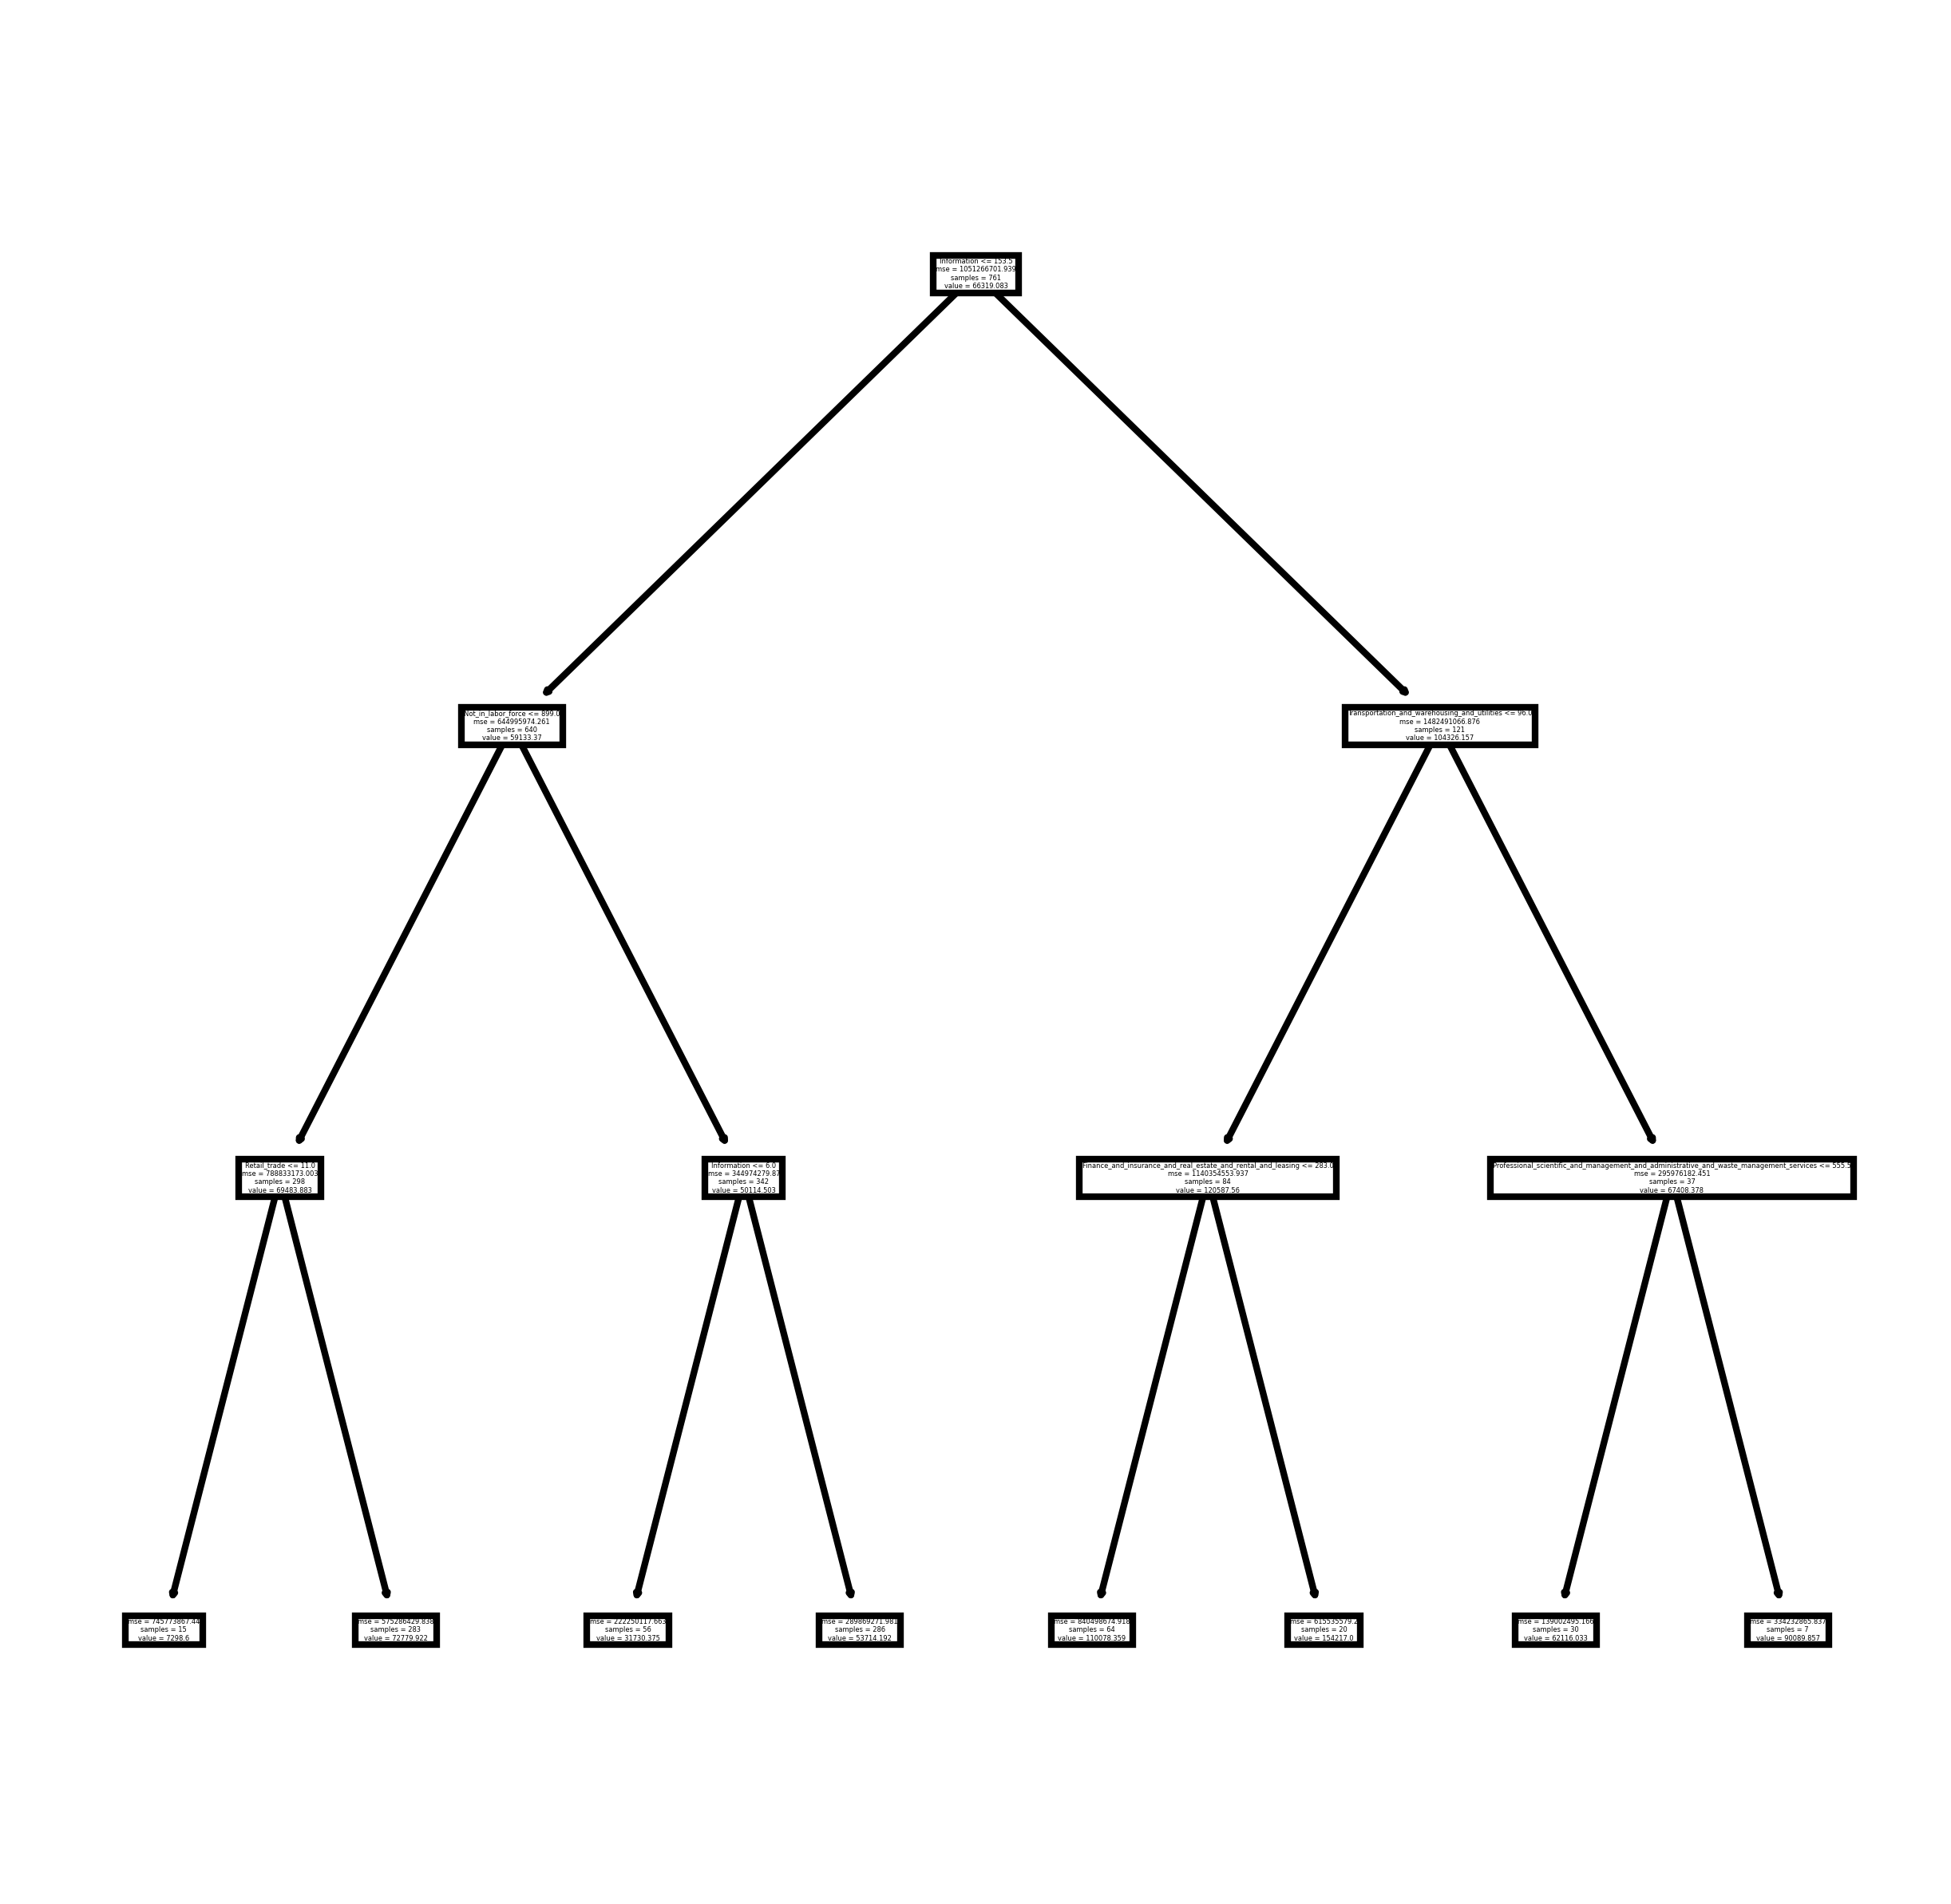

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=600)
plot_tree(model,feature_names= x.columns)

In [15]:
dot_data = export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("census.dot")

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'census.dot'], make sure the Graphviz executables are on your systems' PATH

In [16]:
with open ("census.dot", "r") as fin:
    with open("census_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Civilian_labor_force_Employed")
            line = line.replace("X[1]","Civilian_labor_force_Unemployed")
            line = line.replace("X[2]","In_labor_force_Armed_Forces")
            line = line.replace("X[3]","Not_in_labor_force")
            line = line.replace("X[4]","Agriculture_forestry_fishing_and_hunting_and_mining")
            line = line.replace("X[5]","Construction")            
            line = line.replace("X[6]","Manufacturing")
            line = line.replace("X[7]","Wholesale_trade")
            line = line.replace("X[8]","Retail_trade")
            line = line.replace("X[9]","Transportation_and_warehousing_and_utilities")
            line = line.replace("X[10]","Information")
            line = line.replace("X[11]","Finance_and_insurance_and_real_estate_and_rental_and_leasing")
            line = line.replace("X[12]","Professional_scientific_and_management_and_administrative_and_waste_management_services")
            line = line.replace("X[13]","Educational_services_and_health_care_and_social_assistance")
            line = line.replace("X[14]","Arts_entertainment_and_recreation_and_accommodation_and_food_services")
            line = line.replace("X[15]","Other_services_except_public_administration")
            line = line.replace("X[16]","Public_administration")          
            fout.write(line)

In [18]:
#First DecisionTree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
reg3 = DecisionTreeRegressor(max_depth = 3)
reg3 = reg3.fit(x_train, y_train)

In [20]:
predictions_3_test = reg3.predict(x_test)

In [21]:
mean_squared_error(predictions_3_test, y_test)

515389666.8586279

In [22]:
preds3_train = reg3.predict(x_train)

In [23]:
mean_squared_error(preds3_train, y_train)

473257106.6159102

Mean Sq Errors

 Test: 515,389,666
 
 Train:473,257,106

In [24]:
dot_data = export_graphviz(reg3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("census1.dot")

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'census1.dot'], make sure the Graphviz executables are on your systems' PATH

In [25]:

with open ("census1.dot", "r") as fin:
    with open("census_fixed1.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Civilian_labor_force_Employed")
            line = line.replace("X[1]","Civilian_labor_force_Unemployed")
            line = line.replace("X[2]","In_labor_force_Armed_Forces")
            line = line.replace("X[3]","Not_in_labor_force")
            line = line.replace("X[4]","Agriculture_forestry_fishing_and_hunting_and_mining")
            line = line.replace("X[5]","Construction")            
            line = line.replace("X[6]","Manufacturing")
            line = line.replace("X[7]","Wholesale_trade")
            line = line.replace("X[8]","Retail_trade")
            line = line.replace("X[9]","Transportation_and_warehousing_and_utilities")
            line = line.replace("X[10]","Information")
            line = line.replace("X[11]","Finance_and_insurance_and_real_estate_and_rental_and_leasing")
            line = line.replace("X[12]","Professional_scientific_and_management_and_administrative_and_waste_management_services")
            line = line.replace("X[13]","Educational_services_and_health_care_and_social_assistance")
            line = line.replace("X[14]","Arts_entertainment_and_recreation_and_accommodation_and_food_services")
            line = line.replace("X[15]","Other_services_except_public_administration")
            line = line.replace("X[16]","Public_administration")          
            fout.write(line)

In [27]:
#Second DecisionTree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
reg4 = DecisionTreeRegressor(max_depth = 4)
reg4 = reg4.fit(x_train, y_train)
predictions_4_test = reg4.predict(x_test)

In [28]:
mean_squared_error(predictions_4_test, y_test)

547104832.0995239

In [29]:
preds4_train = reg4.predict(x_train)
mean_squared_error(preds4_train, y_train)

374735174.2202207

Mean Sq Errors

 Test: 547,104,832
 
 Train:374,735,174

In [30]:
dot_data = export_graphviz(reg4, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("census2.dot")

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'census2.dot'], make sure the Graphviz executables are on your systems' PATH

In [32]:
with open ("census2.dot", "r") as fin:
    with open("census_fixed2.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Civilian_labor_force_Employed")
            line = line.replace("X[1]","Civilian_labor_force_Unemployed")
            line = line.replace("X[2]","In_labor_force_Armed_Forces")
            line = line.replace("X[3]","Not_in_labor_force")
            line = line.replace("X[4]","Agriculture_forestry_fishing_and_hunting_and_mining")
            line = line.replace("X[5]","Construction")            
            line = line.replace("X[6]","Manufacturing")
            line = line.replace("X[7]","Wholesale_trade")
            line = line.replace("X[8]","Retail_trade")
            line = line.replace("X[9]","Transportation_and_warehousing_and_utilities")
            line = line.replace("X[10]","Information")
            line = line.replace("X[11]","Finance_and_insurance_and_real_estate_and_rental_and_leasing")
            line = line.replace("X[12]","Professional_scientific_and_management_and_administrative_and_waste_management_services")
            line = line.replace("X[13]","Educational_services_and_health_care_and_social_assistance")
            line = line.replace("X[14]","Arts_entertainment_and_recreation_and_accommodation_and_food_services")
            line = line.replace("X[15]","Other_services_except_public_administration")
            line = line.replace("X[16]","Public_administration")          
            fout.write(line)

In [33]:
#Third DecisionTree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
reg5 = DecisionTreeRegressor(max_depth = 5)
reg5 = reg5.fit(x_train, y_train)
predictions_5_test = reg5.predict(x_test)

In [34]:
mean_squared_error(predictions_5_test, y_test)

579241835.0741863

In [35]:
preds5_train = reg5.predict(x_train)
mean_squared_error(preds5_train, y_train)

263227001.92459476

Mean Sq Errors

 Test: 579,241,835
 
 Train:263,227,001

In [36]:
dot_data = export_graphviz(reg5, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("census3.dot")

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'census3.dot'], make sure the Graphviz executables are on your systems' PATH

In [38]:
with open ("census3.dot", "r") as fin:
    with open("census_fixed3.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Civilian_labor_force_Employed")
            line = line.replace("X[1]","Civilian_labor_force_Unemployed")
            line = line.replace("X[2]","In_labor_force_Armed_Forces")
            line = line.replace("X[3]","Not_in_labor_force")
            line = line.replace("X[4]","Agriculture_forestry_fishing_and_hunting_and_mining")
            line = line.replace("X[5]","Construction")            
            line = line.replace("X[6]","Manufacturing")
            line = line.replace("X[7]","Wholesale_trade")
            line = line.replace("X[8]","Retail_trade")
            line = line.replace("X[9]","Transportation_and_warehousing_and_utilities")
            line = line.replace("X[10]","Information")
            line = line.replace("X[11]","Finance_and_insurance_and_real_estate_and_rental_and_leasing")
            line = line.replace("X[12]","Professional_scientific_and_management_and_administrative_and_waste_management_services")
            line = line.replace("X[13]","Educational_services_and_health_care_and_social_assistance")
            line = line.replace("X[14]","Arts_entertainment_and_recreation_and_accommodation_and_food_services")
            line = line.replace("X[15]","Other_services_except_public_administration")
            line = line.replace("X[16]","Public_administration")          
            fout.write(line)

In [39]:
#K-Nearest Neighbors Regression

In [40]:
x_train, x_test,y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [61]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [62]:
y_test_pred = knn.predict(x_test)

In [63]:
mean_squared_error(y_test_pred, y_test)

404347438.28631085

In [64]:
y_train_pred  = knn.predict(x_train)
mean_squared_error(y_train_pred, y_train)

281520449.56514984

In [65]:
scaler = MinMaxScaler()

In [66]:
x_train_scaled = scaler.fit_transform(x_train)

In [67]:
x_test_scaled = scaler.fit_transform(x_test)

In [68]:
mses = []
for k in range(1,15):
    print("Now computing MSE for k=",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train_scaled, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test_scaled)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses.append(mse)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5
Now computing MSE for k= 6
Now computing MSE for k= 7
Now computing MSE for k= 8
Now computing MSE for k= 9
Now computing MSE for k= 10
Now computing MSE for k= 11
Now computing MSE for k= 12
Now computing MSE for k= 13
Now computing MSE for k= 14


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

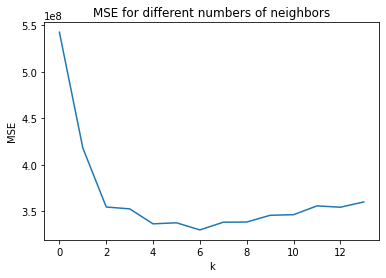

In [69]:
plt.plot(mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")